# Bootstrap Aggregating (Bagging) to Reduce Variance in Decision Tree Analysis

> Semant Jain, PhD 
> semant@gmail.com

### Background
Bootstrap aggregating (Bagging) is a machine learning algorithm used for classification and regression. As individual machine learning algorithms can lead to overfitting, averaging all the constituent models reduces variance and overfitting which can improve stability and accuracy. While bagging has been usually applied to decision tree methods, it can be used with any other type of classification or regression method.

As an ensemble training model, Bagging promotes variance by training each model by using a randomly drawn subset of the training set. In the ensemble, each model votes with equal weight. For instance, very high classification accuracy can be achieved by the random forest algorithm by using bagging to combine random decision trees.


### Summary
To compare the improvement offered by bagging, a public dataset - Mnist - was analyzed by a decision tree, 5 decision trees, 10 decision trees, and a bagging classifier with 20 estimators. While the decision tree was able to achieve 100% training accuracy, its testing accuracy was merely 84% which indicated overfitting. As the number of decision trees in the ensemble increased, so, did the testing accuracy (89.3% with a random forest forest with 5 decisions trees, 92.9% with 10 decision trees, and 93.6% with a 20 decision tree classifier).


### Contents
+ Setting up
+ Models
+ Visualization


### Libraries
+ Numpy
+ Matplotlib
+ Sklearn

# 1. Setting up

### Imporing libraries

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Importing data

In [0]:
mnist = load_digits()
mnist.keys()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

print(x_train.shape, y_train.shape)
print(x_test.shape , y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


# 2. Models

### Decision Tree

In [0]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

q = []

dt1 = dt.score(x_test, y_test)
dt2 = dt.score(x_train, y_train)

print(round(dt1, 4), round(dt2, 4))

0.84 1.0


### Bagging: Random Forest with 5 Decision Trees

In [0]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(x_train, y_train)

rf1 = rf.score(x_test, y_test)
rf2 = rf.score(x_train, y_train)

print(round(rf1, 4), round(rf2, 4))

0.8933 0.9903


### Bagging: Random Forest with 10 Decision Trees

In [0]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(x_train, y_train)

rf3 = rf.score(x_test, y_test)
rf4 = rf.score(x_train, y_train)

print(round(rf3, 4), round(rf4, 4))

0.9289 1.0


### Bagging: Other classifers

In [0]:
bg = BaggingClassifier(DecisionTreeClassifier(), 
                      max_samples = 0.5, # max % of original dataset that can be passed into a particular classifier (e.g. DT)
                       n_estimators = 20, # how many DTs in bagging
                       max_features = 1.0) # max split on '1' feature at each node. Ensure to put in 1.0
bg.fit(x_train, y_train)

bg1 = bg.score(x_test, y_test)
bg2 = bg.score(x_train, y_train)

print(round(bg1, 4), round(bg2, 4))

0.9356 0.9918


# 3. Visualization

In [0]:
# initialise data of lists. 
data = {'Training Accuracy':[dt2, rf2, rf4, bg2], 'Testing Accuracy':[dt1, rf1, rf3, bg1]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Decision Tree', 'Random Forest (5)', 'Random Forest (10)', 'DT Classifier (20)']) 
  
# print the data 
df

,Training Accuracy,Testing Accuracy
Decision Tree,1.000000,0.840000
Random Forest (5),0.990349,0.893333
Random Forest (10),1.000000,0.928889
DT Classifier (20),0.991834,0.935556


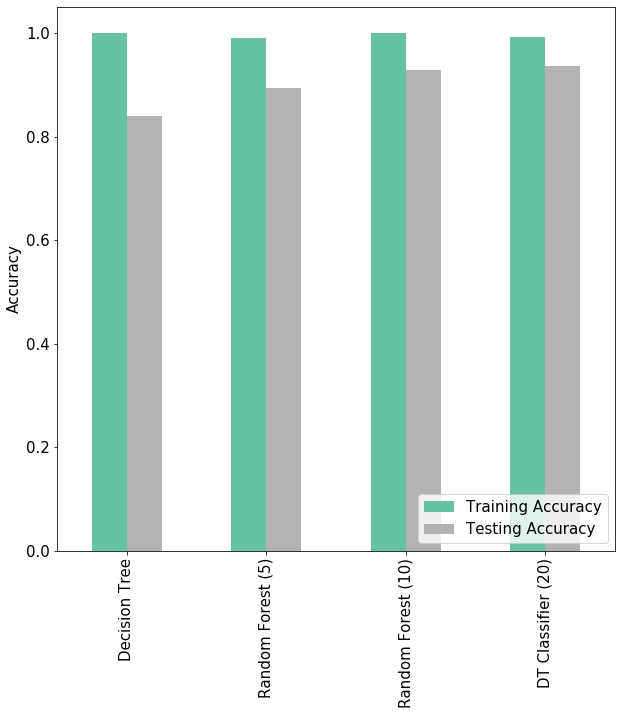

In [0]:
# Plot
df.plot(figsize=(10,10), kind = "bar", legend = True, colormap = 'Set2')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend(fontsize = 15, loc='lower right')

plt.savefig("CE_ML_Project_16_02.jpeg")
plt.show()